# 1. 문제 정의 - 보스턴 집 값을 예측

#### 지도학습/ 회귀

# 2. 데이터 수집

#### 사이킷런에 내장되어 있는 데이터(load_boston) 불러오고 그 데이터를 dataset 변수에 저장하기

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [2]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
# crim 지역별 1인당 범죄율 **
# zn 25000평방피트를 초과하는 거주지역의 비율
# indus 비소매상업지역이 차지하는 면적 비율
# chas 찰스강 위치변수(강 주변 1, 이외 0) **
# nox 일산화질소 농도
# rm 집의 평균 방 수 **
# age 1940년 이전에 지어진 비율
# dis 5가지 보스턴 시 고용 시설까지의 거리
# rad 순환고속도로의 접근 용이성
# tax 10000달러 당 재산세율
# ptratio 지역별 학생과 교사 비율
# b 지역별 흑인 비율 **
# lstat 급여가 낮은 직업에 종사하는 인구 비율 **
# medv 가격

# 3. 데이터 전처리

In [4]:
import pandas as pd

#### data는 dataset.data, 칼럼명은 dataset.feature_names으로 데이터프레임을 만들어 bostonDF 에 저장하기 + 5줄 보이기

In [5]:
bostonDF = pd.DataFrame(data=boston.data, columns=boston.feature_names)
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### bostonDF에 'PRICE'라는 새로운 칼럼 만들기, 이 안에는 정답(Lable - dataset.target)이 들어감 + 5줄 보이기

In [6]:
bostonDF['PRICE'] = boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### 결측치 확인하기

In [7]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


#### bostonDF을 문제데이터(X), 정답데이터(y)로 분리하기  --> 분리한 이후 X.shape과 y.shape을 통해 잘 분리되었는지 확인해보기
- X는 bostonDF에서 'PRICE' 칼럼 삭제하여 저장
- y는 bostonDF에서 'PRICE' 칼럼만 저장

In [8]:
X = bostonDF.iloc[:, :13]
y = bostonDF.iloc[:, 13]

In [9]:
X.shape

(506, 13)

In [10]:
y.shape

(506,)

# 4. EDA(얼만큼 집값과 관계가 있는지 확인) -seaborn의 pairplot 사용

In [11]:
import seaborn as sns

#### x축은 dataset.feature_names[:4], y축은 'PRICE', kind = 'reg'

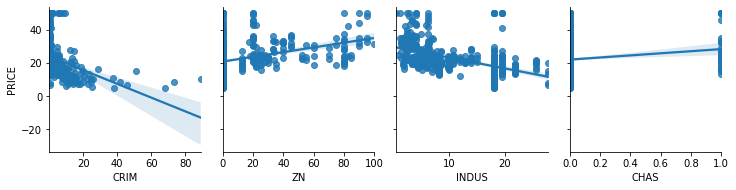

In [12]:
sns.pairplot(bostonDF, x_vars=boston.feature_names[:4], y_vars='PRICE', kind='reg')

#### x축은 dataset.feature_names[4:8], y축은 'PRICE', kind = 'reg'

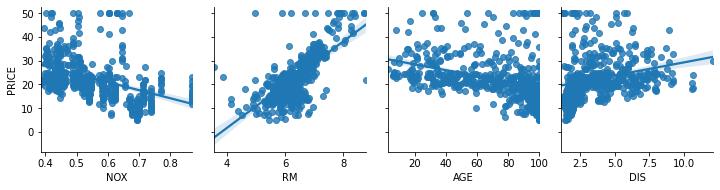

In [13]:
sns.pairplot(bostonDF, x_vars=boston.feature_names[4:8], y_vars='PRICE', kind='reg')

#### x축은 dataset.feature_names[8:], y축은 'PRICE', kind = 'reg'

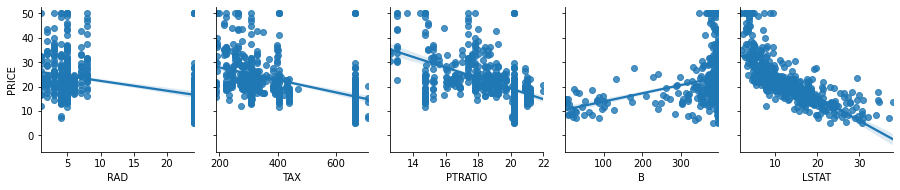

In [14]:
sns.pairplot(bostonDF, x_vars=boston.feature_names[8:], y_vars='PRICE', kind='reg')

# 5. 학습/ 테스트 데이터 나누기

#### test_size=0.3, random_state=0으로 지정하기

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 6. 모델 선택(LinearRegression), 학습

In [18]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

# 7. 모델의 계수, 절편 확인

In [23]:
print("계수:{}".format(lr.coef_))
print("절편:{}".format(lr.intercept_))

계수:[-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]
절편:37.937107741833294


# 8. 평가(R Squared, RMSE 둘 다 계산해보기)

In [24]:
print("훈련 점수 : {}".format(lr.score(X_train, y_train)))
print("테스트 점수 : {}".format(lr.score(X_test, y_test)))

훈련 점수 : 0.7645451026942549
테스트 점수 : 0.6733825506400184


In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [26]:
y_pred = lr.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

5.214975145375413

# 9. 특성 늘리기, MinMaxScaler 하여 다시 학습, 평가하기

In [27]:
col = X.columns
for i in range(col.size):
    for j in range(i,col.size):
        X[col[i]+'x'+col[j]] = X[col[i]]*X[col[j]]

In [28]:
print(X.shape)
X.head()

(506, 104)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAXxTAX,TAXxPTRATIO,TAXxB,TAXxLSTAT,PTRATIOxPTRATIO,PTRATIOxB,PTRATIOxLSTAT,BxB,BxLSTAT,LSTATxLSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089


In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [31]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,...,0.111883,0.158299,0.415874,0.039337,0.231614,0.720857,0.068454,1.000000,0.130834,0.015157
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.050143,0.139227,0.339867,0.069100,0.486041,0.838769,0.185097,1.000000,0.240435,0.055985
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.050143,0.139227,0.336374,0.019214,0.486041,0.830160,0.062440,0.979596,0.104717,0.009208
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.030422,0.125760,0.309929,0.006201,0.587043,0.876173,0.039844,0.988594,0.076645,0.003928
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.030422,0.125760,0.311716,0.027605,0.587043,0.881218,0.100113,1.000000,0.140056,0.017666


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [33]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
print("훈련 세트 점수: {}".format(lr2.score(X_train, y_train)))
print("테스트 세트 점수: {}".format(lr2.score(X_test, y_test)))

훈련 세트 점수: 0.9315216269307341
테스트 세트 점수: 0.8043803931143604


# 10. Ridge 사용하여 과대적합 해결하기

훈련 세트 점수: 0.918
테스트 세트 점수: 0.902


2.81453641493407

# 11. Lasso 사용하여 과대적합 해결하기